In [1]:
import numpy as np
import matplotlib
import pylab as plt

In [2]:
def f(x,y, h=0, k=0, A=0, a=10, b=10):
    xpart = (x - h) * np.cos(A) + (y - k) * np.sin(A)
    ypart = (x - h) * np.sin(A) - (y - k) * np.cos(A)
    
    res = np.power(xpart, 2) / np.power(a,2) + np.power(ypart, 2) / np.power(a,2)
    
    return res
    
def dice_loss(x, y):
    xflat = x.flatten()
    yflat = y.flatten()
    intersection = np.sum(xflat * yflat)
    return 1 - ((2 * intersection + 1) / (1 + np.sum(xflat) + np.sum(yflat)))

In [3]:
x, y = np.meshgrid(np.arange(0,800), np.arange(0,540))

In [4]:
z = f(x,y,A=1.13,h=200,k=200, a=20, b=20)

In [5]:
z[np.where(z < 1 - 0.2)] = 0
z[np.where(z > 1 + 0.2)] = 0
z[np.where(z != 0)] = 1

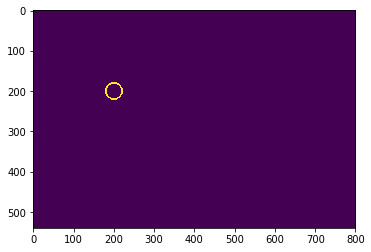

In [6]:
plt.imshow(z)
plt.show()

In [7]:
z.shape

(540, 800)

In [8]:
img = matplotlib.image.imread('../dataset/training_set/010_HC_Annotation.png')

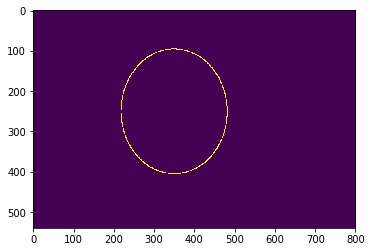

In [9]:
plt.imshow(img)
plt.show()

In [10]:
ym, xm = np.where(img==1)

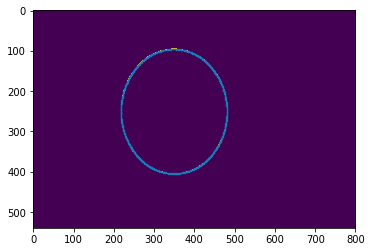

In [11]:
plt.imshow(img)
plt.scatter(xm, ym, s=0.1, marker='x')
plt.show()

In [12]:
import sys
sys.path.append('../')

In [13]:
from src.utils import LSqEllipse

In [14]:
lsqe = LSqEllipse()
lsqe.fit([xm, ym])

In [15]:
lsqe.parameters()

([349.1976656410707, 250.38332271021628],
 131.27990560900506,
 154.60797686344756,
 -0.008992229309326432)

In [16]:
center, width, height, phi = lsqe.parameters()

In [17]:
np.rad2deg(phi)

-0.5152167878382438

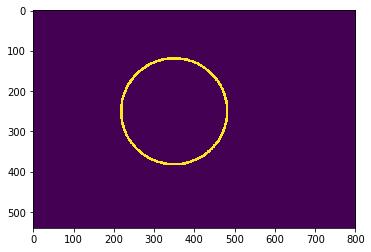

In [18]:
z = f(x,y,A=np.rad2deg(phi), h=center[0],k=center[1], a=width, b=height)
z[np.where(z < 1 - 5e-2)] = 0
z[np.where(z > 1 + 5e-2)] = 0
z[np.where(z != 0)] = 1
plt.imshow(z)
plt.show()

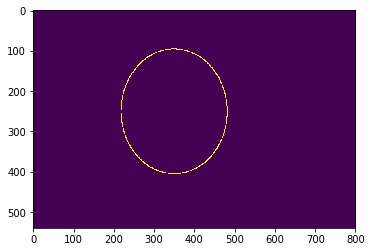

In [19]:
plt.imshow(img)
plt.show()